# Visualisation and Representation of data


In [27]:
import matplotlib.pyplot as plt 
import pandas as pd

In [28]:
# Lire les premières lignes du fichier pour inspecter sa structure
df = pd.read_csv("data/curva_pibc_uof_2024020101_limpio.csv", sep=";", encoding="latin1")
df.head()

,Hora,Fecha,Pais,Unidad,Tipo Oferta,Energía Compra/Venta,Precio Compra/Venta,Ofertada (O)/Casada (C)
0,1,2024-02-01,MI,WMVD101,C,0.2,1002.0,O
1,1,2024-02-01,MI,WMVD147,C,0.1,1002.0,O
2,1,2024-02-01,MI,IBEVD15,C,2.0,801.0,O
3,1,2024-02-01,MI,IBEVD14,C,2.0,801.0,O
4,1,2024-02-01,MI,NXVD219,C,49.5,700.0,O


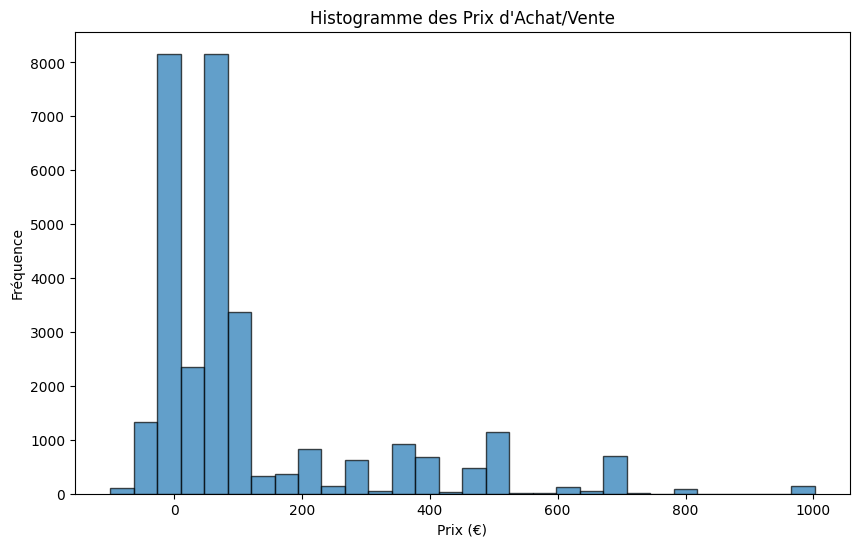

In [29]:
plt.figure(figsize=(10, 6))
plt.hist(df['Precio Compra/Venta'], bins=30, edgecolor='k', alpha=0.7)
plt.title("Histogramme des Prix d'Achat/Vente")
plt.xlabel('Prix (€)')
plt.ylabel('Fréquence')
plt.show()

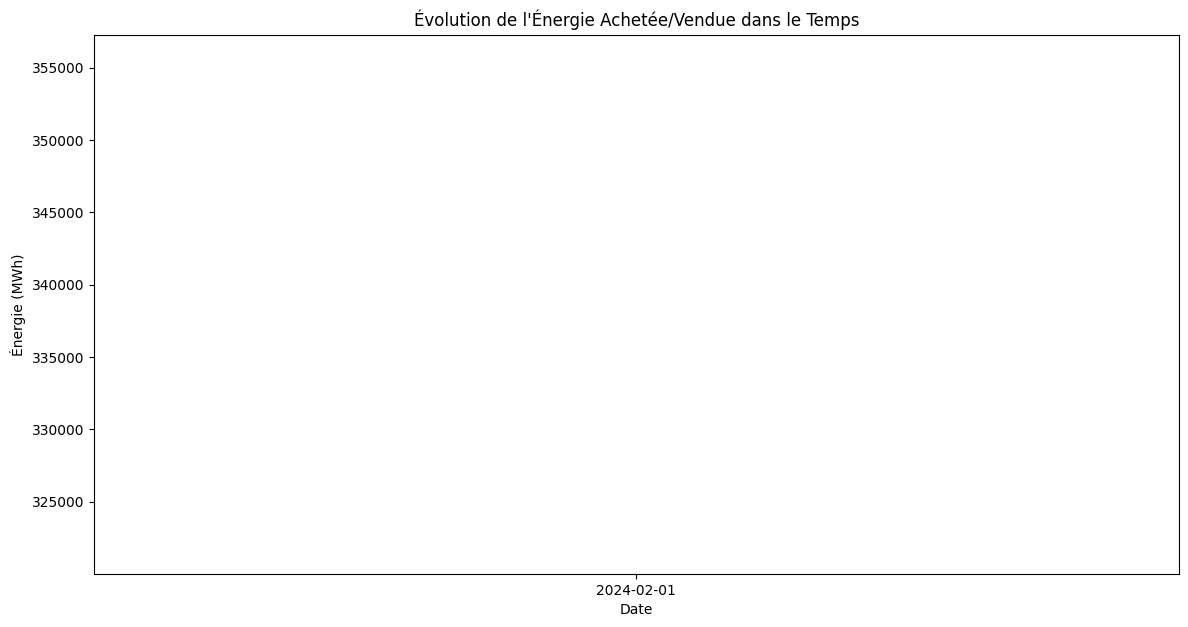

In [30]:
# Agréger les données par date et somme de l'énergie
energy_per_date = df.groupby('Fecha')['Energía Compra/Venta'].sum()

plt.figure(figsize=(14, 7))
plt.plot(energy_per_date.index, energy_per_date.values)
plt.title("Évolution de l'Énergie Achetée/Vendue dans le Temps")
plt.xlabel('Date')
plt.ylabel('Énergie (MWh)')
plt.show()

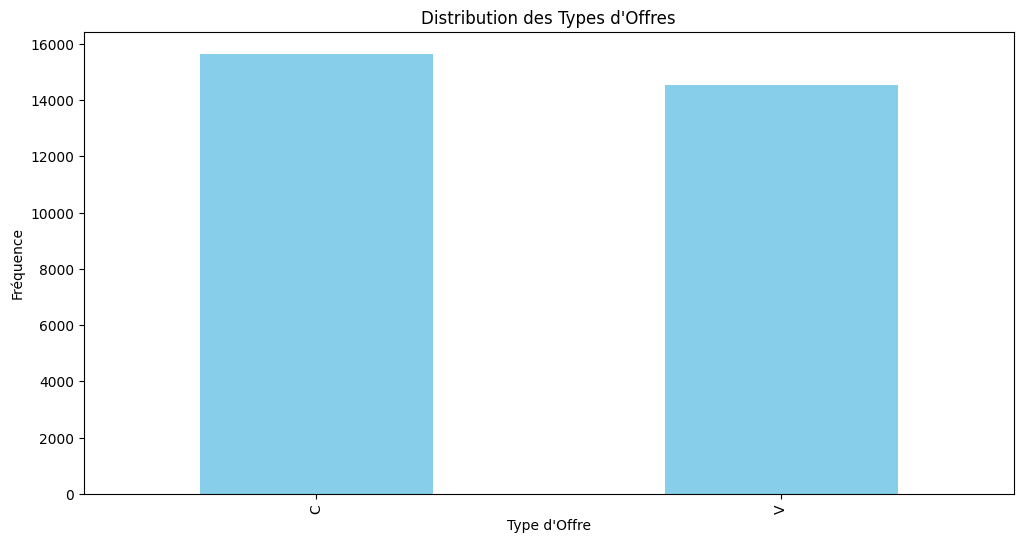

In [31]:
plt.figure(figsize=(12, 6))
df['Tipo Oferta'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Distribution des Types d'Offres")
plt.xlabel('Type d\'Offre')
plt.ylabel('Fréquence')
plt.show()

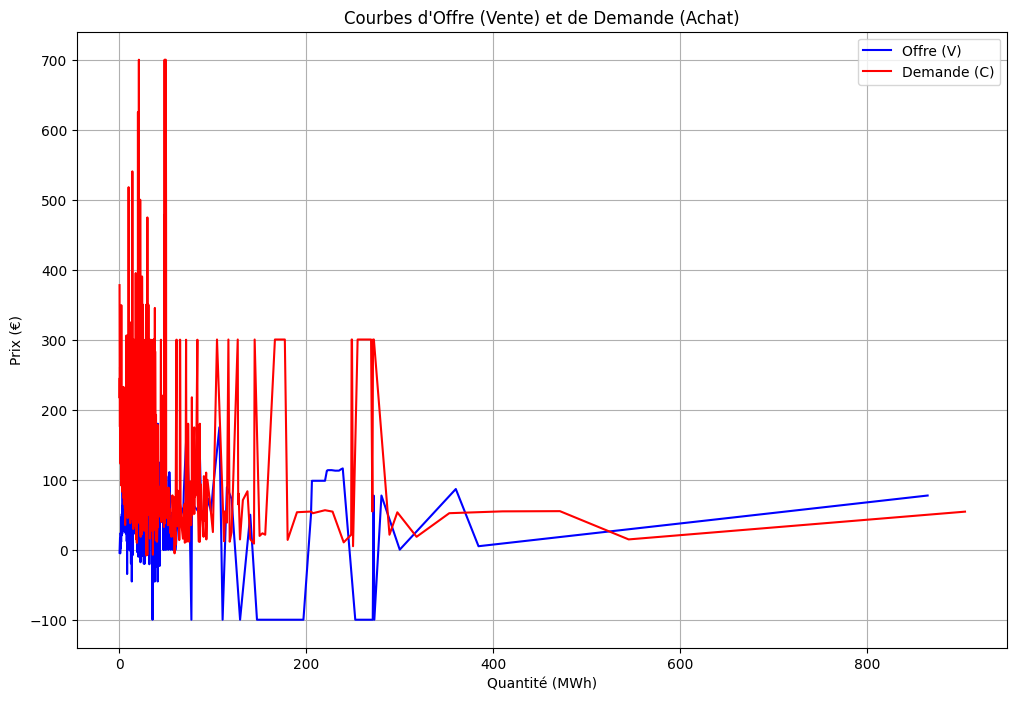

In [33]:
# Filtrer les données pour séparer les types d'offres de vente (V) et d'achat (C)
offre = df[df['Tipo Oferta'] == 'V']
demande = df[df['Tipo Oferta'] == 'C']

# Agréger les données par quantité et calculer le prix moyen pour chaque quantité
offre_aggregated = offre.groupby('Energía Compra/Venta')['Precio Compra/Venta'].mean().reset_index()
demande_aggregated = demande.groupby('Energía Compra/Venta')['Precio Compra/Venta'].mean().reset_index()

# Tracer les courbes d'offre et de demande
plt.figure(figsize=(12, 8))

plt.plot(offre_aggregated['Energía Compra/Venta'], offre_aggregated['Precio Compra/Venta'], label='Offre (V)', color='blue')
plt.plot(demande_aggregated['Energía Compra/Venta'], demande_aggregated['Precio Compra/Venta'], label='Demande (C)', color='red')

plt.title("Courbes d'Offre (Vente) et de Demande (Achat)")
plt.xlabel('Quantité (MWh)')
plt.ylabel('Prix (€)')
plt.legend()
plt.grid(True)
plt.show()



In [34]:
offre[offre["Precio Compra/Venta"]>0].head()


,Hora,Fecha,Pais,Unidad,Tipo Oferta,Energía Compra/Venta,Precio Compra/Venta,Ofertada (O)/Casada (C)
537,1,2024-02-01,MI,ACE4,V,12.4,0.01,O
538,1,2024-02-01,MI,CEVD302,V,1.3,0.20,O
539,1,2024-02-01,MI,EGVD074,V,0.1,1.00,O
540,1,2024-02-01,MI,EBRA,V,0.4,1.00,O
541,1,2024-02-01,MI,EGVD292,V,1.7,1.50,O


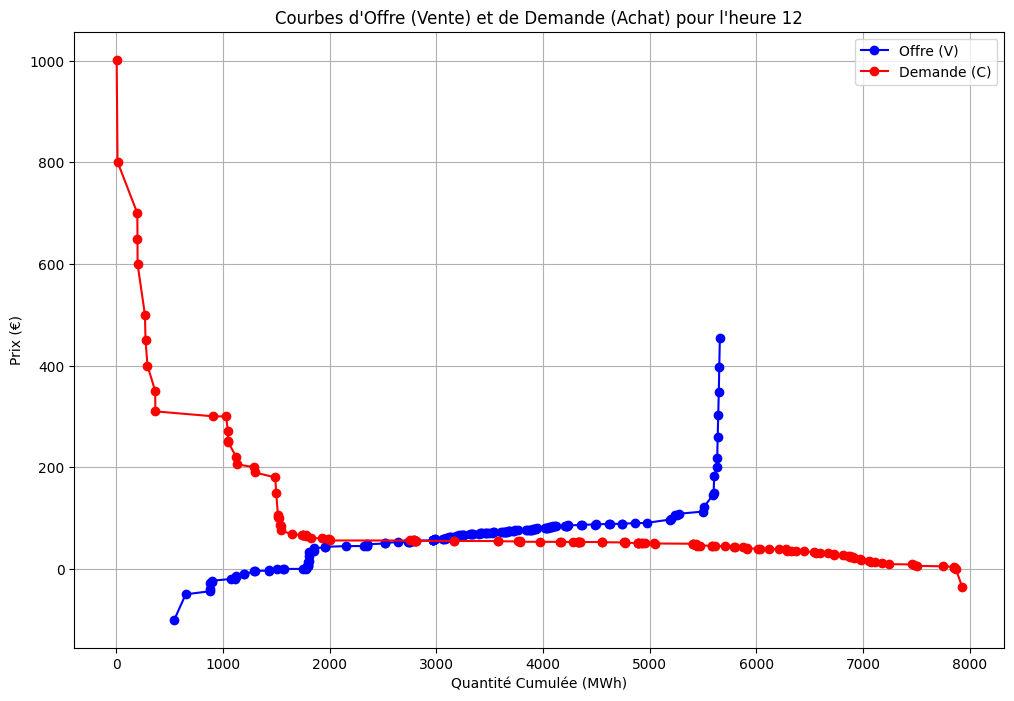

In [36]:
# Filtrer les données pour une heure spécifique, par exemple 'Hora 1'
hora_fixe = 12  # Vous pouvez changer cette valeur pour d'autres heures
df_hora = df[df['Hora'] == hora_fixe]

# Filtrer les données pour séparer les types d'offres de vente (V) et d'achat (C)
offre = df_hora[df_hora['Tipo Oferta'] == 'V']
demande = df_hora[df_hora['Tipo Oferta'] == 'C']

# Agréger les données par quantité cumulée et calculer le prix moyen pour chaque quantité cumulée
offre_aggregated = offre.groupby('Precio Compra/Venta')['Energía Compra/Venta'].sum().reset_index()
demande_aggregated = demande.groupby('Precio Compra/Venta')['Energía Compra/Venta'].sum().reset_index()

# Trier les données pour que l'offre soit croissante et la demande décroissante
offre_aggregated = offre_aggregated.sort_values(by='Precio Compra/Venta')
demande_aggregated = demande_aggregated.sort_values(by='Precio Compra/Venta', ascending=False)

# Calculer la quantité cumulée pour l'offre et la demande
offre_aggregated['Quantité Cumulée'] = offre_aggregated['Energía Compra/Venta'].cumsum()
demande_aggregated['Quantité Cumulée'] = demande_aggregated['Energía Compra/Venta'].cumsum()

# Tracer les courbes d'offre et de demande
plt.figure(figsize=(12, 8))

plt.plot(offre_aggregated['Quantité Cumulée'], offre_aggregated['Precio Compra/Venta'], label='Offre (V)', color='blue', marker='o')
plt.plot(demande_aggregated['Quantité Cumulée'], demande_aggregated['Precio Compra/Venta'], label='Demande (C)', color='red', marker='o')

plt.title(f"Courbes d'Offre (Vente) et de Demande (Achat) pour l'heure {hora_fixe}")
plt.xlabel('Quantité Cumulée (MWh)')
plt.ylabel('Prix (€)')
plt.legend()
plt.grid(True)
plt.show()


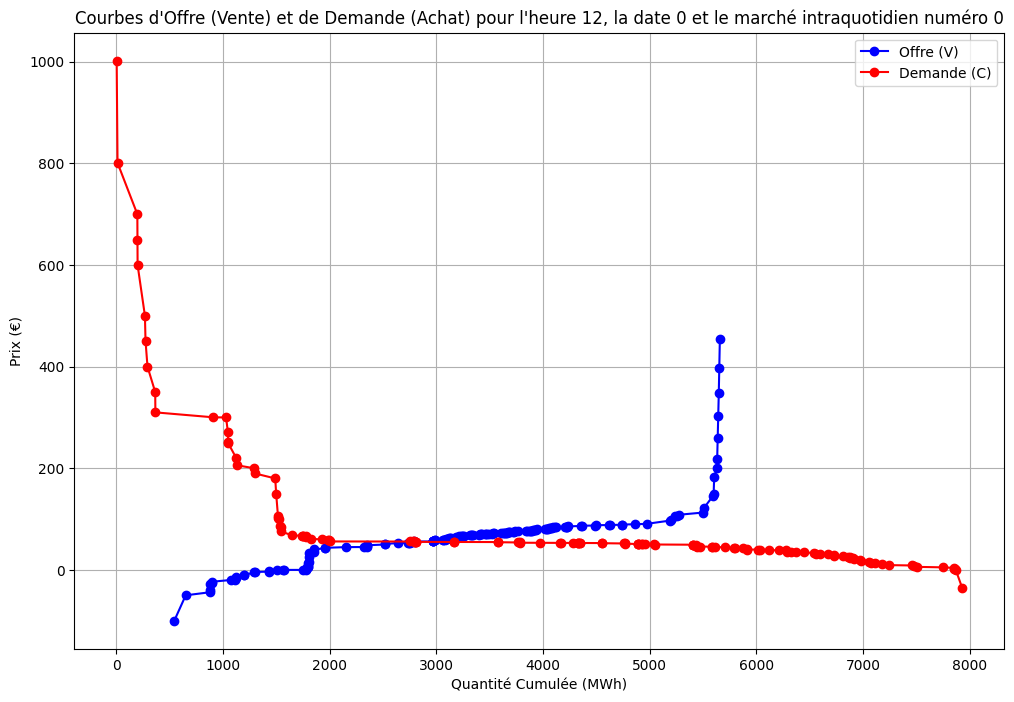

In [42]:
file_path = "app/extracted/curva_pibc_uof_202402/curva_pibc_uof_2024020101.csv"
hour = 12

day = 0
number = 0

df = pd.read_csv(file_path, sep=";", encoding="latin1")

df_hora = df[df['Hora'] == hour]

# Filtrer les données pour séparer les types d'offres de vente (V) et d'achat (C)
offre = df_hora[df_hora['Tipo Oferta'] == 'V']
demande = df_hora[df_hora['Tipo Oferta'] == 'C']

# Agréger les données par quantité cumulée et calculer le prix moyen pour chaque quantité cumulée
offre_aggregated = offre.groupby('Precio Compra/Venta')['Energía Compra/Venta'].sum().reset_index()
demande_aggregated = demande.groupby('Precio Compra/Venta')['Energía Compra/Venta'].sum().reset_index()

# Trier les données pour que l'offre soit croissante et la demande décroissante
offre_aggregated = offre_aggregated.sort_values(by='Precio Compra/Venta')
demande_aggregated = demande_aggregated.sort_values(by='Precio Compra/Venta', ascending=False)

# Calculer la quantité cumulée pour l'offre et la demande
offre_aggregated['Quantité Cumulée'] = offre_aggregated['Energía Compra/Venta'].cumsum()
demande_aggregated['Quantité Cumulée'] = demande_aggregated['Energía Compra/Venta'].cumsum()

# Tracer les courbes d'offre et de demande
plt.figure(figsize=(12, 8))

plt.plot(offre_aggregated['Quantité Cumulée'], offre_aggregated['Precio Compra/Venta'], label='Offre (V)', color='blue', marker='o')
plt.plot(demande_aggregated['Quantité Cumulée'], demande_aggregated['Precio Compra/Venta'], label='Demande (C)', color='red', marker='o')

plt.title(f"Courbes d'Offre (Vente) et de Demande (Achat) pour l'heure {hour}, la date {day} et le marché intraquotidien numéro {number}")
plt.xlabel('Quantité Cumulée (MWh)')
plt.ylabel('Prix (€)')
plt.legend()
plt.grid(True)

plt.show()

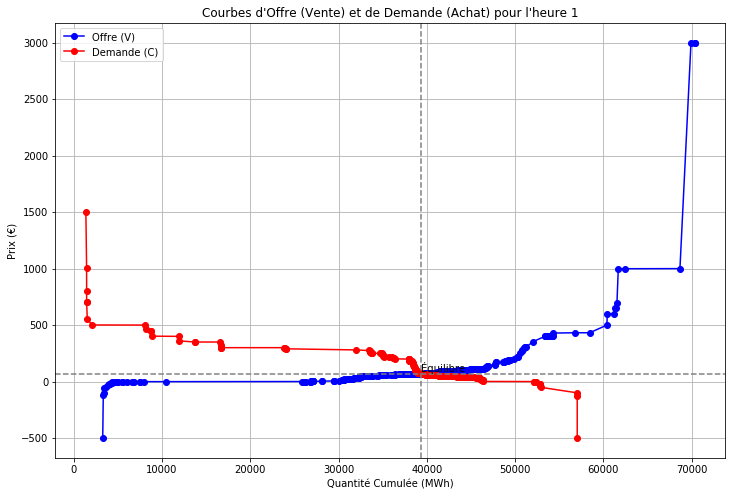

In [49]:
from scipy import interpolate
import numpy as np 

# Filtrer les données pour une heure spécifique, par exemple 'Hora 1'
hora_fixe = 1  # Vous pouvez changer cette valeur pour d'autres heures
df_hora = df[df['Hora'] == hora_fixe]

# Filtrer les données pour séparer les types d'offres de vente (V) et d'achat (C)
offre = df_hora[df_hora['Tipo Oferta'] == 'V']
demande = df_hora[df_hora['Tipo Oferta'] == 'C']

# Agréger les données par quantité cumulée et calculer le prix moyen pour chaque quantité cumulée
offre_aggregated = offre.groupby('Precio Compra/Venta')['Energía Compra/Venta'].sum().reset_index()
demande_aggregated = demande.groupby('Precio Compra/Venta')['Energía Compra/Venta'].sum().reset_index()

# Trier les données pour que l'offre soit croissante et la demande décroissante
offre_aggregated = offre_aggregated.sort_values(by='Precio Compra/Venta')
demande_aggregated = demande_aggregated.sort_values(by='Precio Compra/Venta', ascending=False)

# Calculer la quantité cumulée pour l'offre et la demande
offre_aggregated['Quantité Cumulée'] = offre_aggregated['Energía Compra/Venta'].cumsum()
demande_aggregated['Quantité Cumulée'] = demande_aggregated['Energía Compra/Venta'].cumsum()

# Tracer les courbes d'offre et de demande
plt.figure(figsize=(12, 8))

plt.plot(offre_aggregated['Quantité Cumulée'], offre_aggregated['Precio Compra/Venta'], label='Offre (V)', color='blue', marker='o')
plt.plot(demande_aggregated['Quantité Cumulée'], demande_aggregated['Precio Compra/Venta'], label='Demande (C)', color='red', marker='o')

plt.title(f"Courbes d'Offre (Vente) et de Demande (Achat) pour l'heure {hora_fixe}")
plt.xlabel('Quantité Cumulée (MWh)')
plt.ylabel('Prix (€)')
plt.legend()
plt.grid(True)

# Trouver le point d'intersection (approximatif)
# Créer des fonctions d'interpolation
offre_interpol = interpolate.interp1d(offre_aggregated['Quantité Cumulée'], offre_aggregated['Precio Compra/Venta'], bounds_error=False, fill_value="extrapolate")
demande_interpol = interpolate.interp1d(demande_aggregated['Quantité Cumulée'], demande_aggregated['Precio Compra/Venta'], bounds_error=False, fill_value="extrapolate")

# Trouver la quantité où les prix sont égaux (approximation)
quantities = np.linspace(max(offre_aggregated['Quantité Cumulée'].min(), demande_aggregated['Quantité Cumulée'].min()), 
                         min(offre_aggregated['Quantité Cumulée'].max(), demande_aggregated['Quantité Cumulée'].max()), 500)
intersection_qty = quantities[np.abs(offre_interpol(quantities) - demande_interpol(quantities)).argmin()]
intersection_price = offre_interpol(intersection_qty)

plt.axvline(x=intersection_qty, color='gray', linestyle='--')
plt.axhline(y=intersection_price, color='gray', linestyle='--')
plt.text(intersection_qty, intersection_price, 'Équilibre', horizontalalignment='left', verticalalignment='bottom')

plt.show()


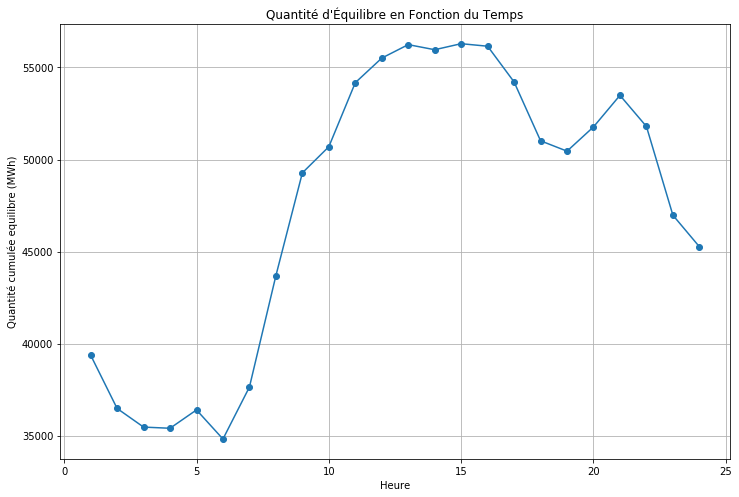

,Hora,Quantité d'Équilibre
0,1.0,39372.595190
1,2.0,36474.905812
2,3.0,35462.305611
3,4.0,35398.706212
4,5.0,36395.096192
5,6.0,34813.514228
6,7.0,37638.903206
7,8.0,43690.004409
8,9.0,49276.153507
9,10.0,50695.251703


In [51]:
# visualisation de la quantité totale sur l'horizon d'un temps 

# Liste pour stocker les quantités d'équilibre pour chaque heure
equilibrium_quantities = []

# Calculer la quantité d'équilibre pour chaque heure
for hora in sorted(df['Hora'].unique()):
    df_hora = df[df['Hora'] == hora]

    # Filtrer les données pour séparer les types d'offres de vente (V) et d'achat (C)
    offre = df_hora[df_hora['Tipo Oferta'] == 'V']
    demande = df_hora[df_hora['Tipo Oferta'] == 'C']

    if offre.empty or demande.empty:
        continue

    # Agréger les données par quantité cumulée et calculer le prix moyen pour chaque quantité cumulée
    offre_aggregated = offre.groupby('Precio Compra/Venta')['Energía Compra/Venta'].sum().reset_index()
    demande_aggregated = demande.groupby('Precio Compra/Venta')['Energía Compra/Venta'].sum().reset_index()

    # Trier les données pour que l'offre soit croissante et la demande décroissante
    offre_aggregated = offre_aggregated.sort_values(by='Precio Compra/Venta')
    demande_aggregated = demande_aggregated.sort_values(by='Precio Compra/Venta', ascending=False)

    # Calculer la quantité cumulée pour l'offre et la demande
    offre_aggregated['Quantité Cumulée'] = offre_aggregated['Energía Compra/Venta'].cumsum()
    demande_aggregated['Quantité Cumulée'] = demande_aggregated['Energía Compra/Venta'].cumsum()

    # Créer des fonctions d'interpolation
    offre_interpol = interpolate.interp1d(offre_aggregated['Quantité Cumulée'], offre_aggregated['Precio Compra/Venta'], bounds_error=False, fill_value="extrapolate")
    demande_interpol = interpolate.interp1d(demande_aggregated['Quantité Cumulée'], demande_aggregated['Precio Compra/Venta'], bounds_error=False, fill_value="extrapolate")

    # Trouver la quantité où les prix sont égaux (approximation)
    quantities = np.linspace(max(offre_aggregated['Quantité Cumulée'].min(), demande_aggregated['Quantité Cumulée'].min()), 
                             min(offre_aggregated['Quantité Cumulée'].max(), demande_aggregated['Quantité Cumulée'].max()), 500)
    intersection_qty = quantities[np.abs(offre_interpol(quantities) - demande_interpol(quantities)).argmin()]
    
    # Stocker la quantité d'équilibre pour cette heure
    equilibrium_quantities.append((hora, intersection_qty))

# Convertir la liste des quantités d'équilibre en DataFrame
equilibrium_df = pd.DataFrame(equilibrium_quantities, columns=['Hora', 'Quantité d\'Équilibre'])

# Tracer la courbe de la quantité d'équilibre en fonction des heures
plt.figure(figsize=(12, 8))
plt.plot(equilibrium_df['Hora'], equilibrium_df['Quantité d\'Équilibre'], marker='o', linestyle='-')
plt.title("Quantité d'Équilibre en Fonction du Temps")
plt.xlabel('Heure')
plt.ylabel('Quantité cumulée equilibre (MWh)')
plt.grid(True)
plt.show()

# Afficher le DataFrame des quantités d'équilibre
equilibrium_df

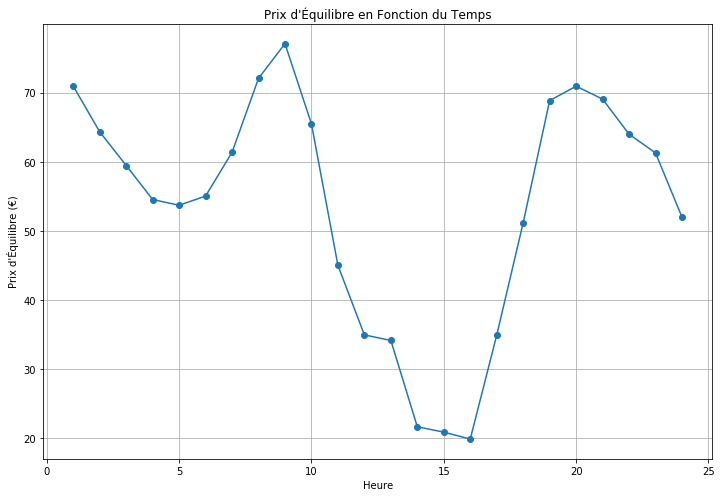

,Hora,Prix d'Équilibre
0,1.0,70.94353404121676
1,2.0,64.32746955449373
2,3.0,59.44965568721816
3,4.0,54.524393516377366
4,5.0,53.69142504477962
5,6.0,55.02728325503471
6,7.0,61.36517573077189
7,8.0,72.07803023189271
8,9.0,77.09782413040367
9,10.0,65.48116767962146


In [52]:
#visualisation de l evolution du prix de l 'electrecité sur le temps 
# Liste pour stocker les prix d'équilibre pour chaque heure
equilibrium_prices = []

# Calculer le prix d'équilibre pour chaque heure
for hora in sorted(df['Hora'].unique()):
    df_hora = df[df['Hora'] == hora]

    # Filtrer les données pour séparer les types d'offres de vente (V) et d'achat (C)
    offre = df_hora[df_hora['Tipo Oferta'] == 'V']
    demande = df_hora[df_hora['Tipo Oferta'] == 'C']

    if offre.empty or demande.empty:
        continue

    # Agréger les données par quantité cumulée et calculer le prix moyen pour chaque quantité cumulée
    offre_aggregated = offre.groupby('Precio Compra/Venta')['Energía Compra/Venta'].sum().reset_index()
    demande_aggregated = demande.groupby('Precio Compra/Venta')['Energía Compra/Venta'].sum().reset_index()

    # Trier les données pour que l'offre soit croissante et la demande décroissante
    offre_aggregated = offre_aggregated.sort_values(by='Precio Compra/Venta')
    demande_aggregated = demande_aggregated.sort_values(by='Precio Compra/Venta', ascending=False)

    # Calculer la quantité cumulée pour l'offre et la demande
    offre_aggregated['Quantité Cumulée'] = offre_aggregated['Energía Compra/Venta'].cumsum()
    demande_aggregated['Quantité Cumulée'] = demande_aggregated['Energía Compra/Venta'].cumsum()

    # Créer des fonctions d'interpolation
    offre_interpol = interpolate.interp1d(offre_aggregated['Quantité Cumulée'], offre_aggregated['Precio Compra/Venta'], bounds_error=False, fill_value="extrapolate")
    demande_interpol = interpolate.interp1d(demande_aggregated['Quantité Cumulée'], demande_aggregated['Precio Compra/Venta'], bounds_error=False, fill_value="extrapolate")

    # Trouver la quantité où les prix sont égaux (approximation)
    quantities = np.linspace(max(offre_aggregated['Quantité Cumulée'].min(), demande_aggregated['Quantité Cumulée'].min()), 
                             min(offre_aggregated['Quantité Cumulée'].max(), demande_aggregated['Quantité Cumulée'].max()), 500)
    intersection_qty = quantities[np.abs(offre_interpol(quantities) - demande_interpol(quantities)).argmin()]
    intersection_price = offre_interpol(intersection_qty)
    
    # Stocker le prix d'équilibre pour cette heure
    equilibrium_prices.append((hora, intersection_price))

# Convertir la liste des prix d'équilibre en DataFrame
equilibrium_df = pd.DataFrame(equilibrium_prices, columns=['Hora', 'Prix d\'Équilibre'])

# Tracer la courbe du prix d'équilibre en fonction des heures
plt.figure(figsize=(12, 8))
plt.plot(equilibrium_df['Hora'], equilibrium_df['Prix d\'Équilibre'], marker='o', linestyle='-')
plt.title("Prix d'Équilibre en Fonction du Temps")
plt.xlabel('Heure')
plt.ylabel('Prix d\'Équilibre (€)')
plt.grid(True)
plt.show()

# Afficher le DataFrame des prix d'équilibre
equilibrium_df
